In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [ ]:
data1 = pd.read_csv("/content/dataset1.csv")
data2 = pd.read_csv("/content/dataset2.csv")
data3 = pd.read_csv("/content/dataset3.csv")

In [ ]:
# data1 preprocessing
data1_y = data1["Type"]
data1 = data1.drop(columns="Type")

In [ ]:
# data2 preprocessing
data2_y = data2["custcat"]
data2 = data2.drop("custcat", axis=1) #Here we assign all the other features as our X independent variables
data2

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
0,2,13,44,64,1,9,4,5,0,0,2
1,3,11,33,136,1,7,5,5,0,0,6
2,3,68,52,116,1,24,1,29,0,1,2
3,2,33,33,33,0,12,2,0,0,1,1
4,2,23,30,30,1,9,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3
996,1,7,34,22,0,2,5,5,0,1,1
997,3,67,59,944,0,40,5,33,0,1,1
998,3,70,49,87,0,18,2,22,0,1,1


In [ ]:
# data3 preprocessing
df = data3

l = df[(df['target'] == 0)].index[3:]

df = df.drop(l)
data3 = df

data3_y = data3['target']
data3 = data3.drop(columns='target')

In [ ]:
data1.head()

,Unnamed: 0,Temperature,L,R,A_M,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# EDA and Preprocessing

In [ ]:
data2.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [ ]:
data2.shape

(1000, 12)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [ ]:
data2.isnull().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
data2.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


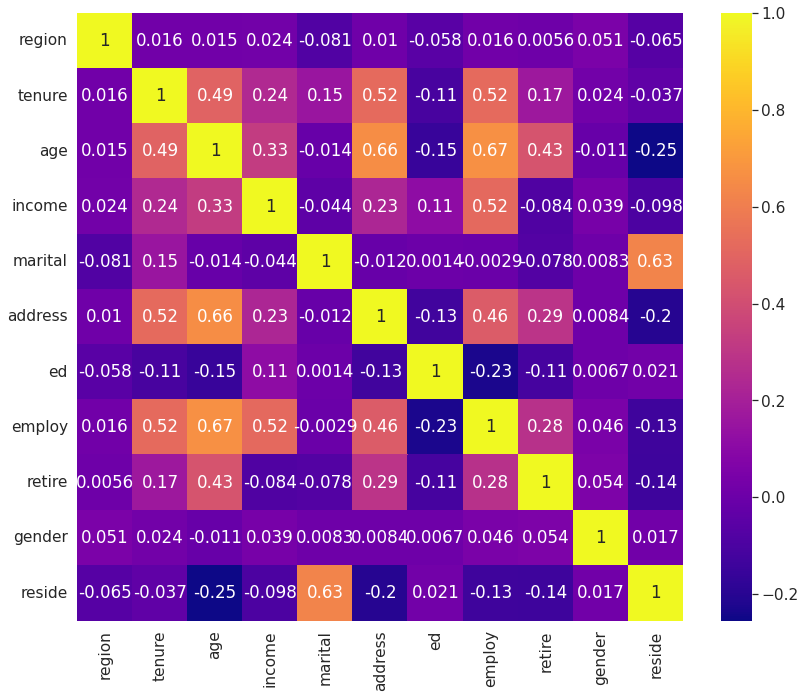

In [ ]:
cor = data2.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

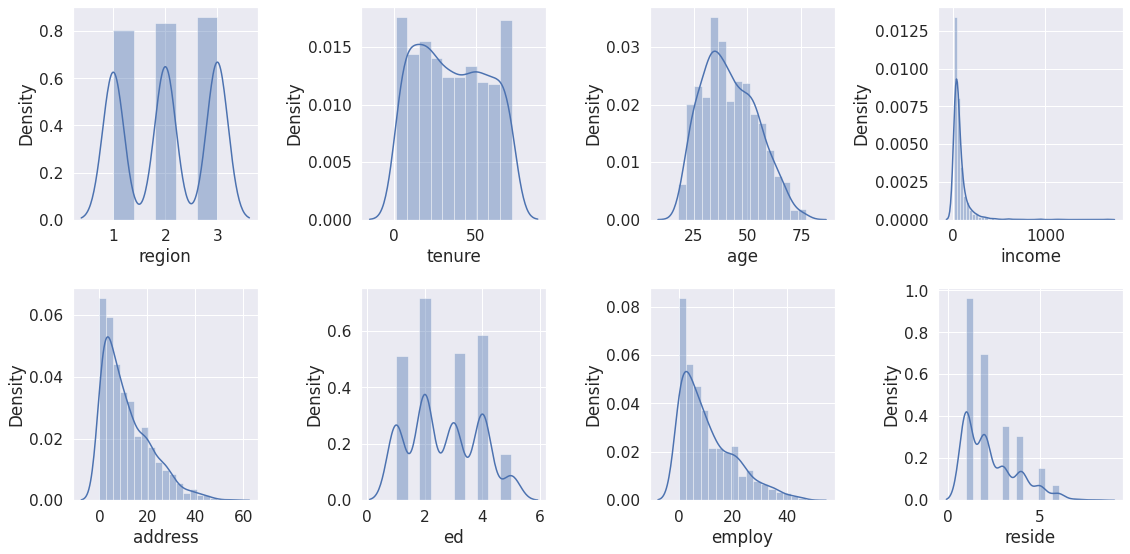

In [ ]:
# -Distribution Plots-

plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
sns.distplot(data2["region"])

plt.subplot(2,4,2)
sns.distplot(data2["tenure"])

plt.subplot(2,4,3)
sns.distplot(data2["age"])

plt.subplot(2,4,4)
sns.distplot(data2["income"])

plt.subplot(2,4,5)
sns.distplot(data2["address"])

plt.subplot(2,4,6)
sns.distplot(data2["ed"])

plt.subplot(2,4,7)
sns.distplot(data2["employ"])

plt.subplot(2,4,8)
sns.distplot(data2["reside"])

plt.tight_layout()

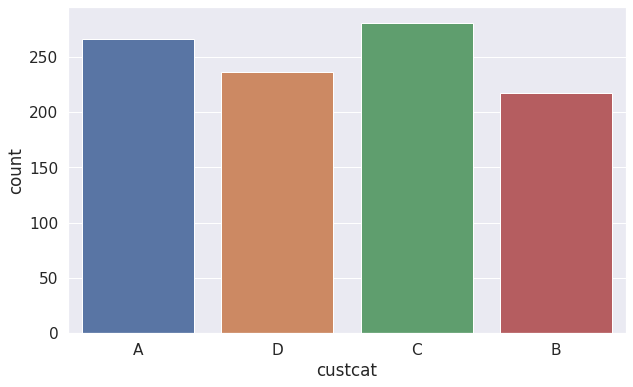

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot(x="custcat",data=data2)

# Data assignment

In [ ]:
data = data3
data_y = data3_y

# Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, distance

Z1 = linkage(data.values, method='single', metric='euclidean')
Z2 = linkage(data.values, method='complete', metric='euclidean')
Z3 = linkage(data.values, method='average', metric='euclidean')
Z4 = linkage(data.values, method='ward', metric='euclidean')

In [ ]:
# d = distance.pdist(data2.values)
ind1 = fcluster(Z1, 0.7*max(Z1[:,2]), 'distance')
n_clust_1 = len(set(ind1))
ind2 = fcluster(Z2, 0.7*max(Z2[:,2]), 'distance')
n_clust_2 = len(set(ind2))
ind3 = fcluster(Z3, 0.7*max(Z3[:,2]), 'distance')
n_clust_3 = len(set(ind3))
ind4 = fcluster(Z4, 0.7*max(Z4[:,2]), 'distance')
n_clust_4 = len(set(ind4))


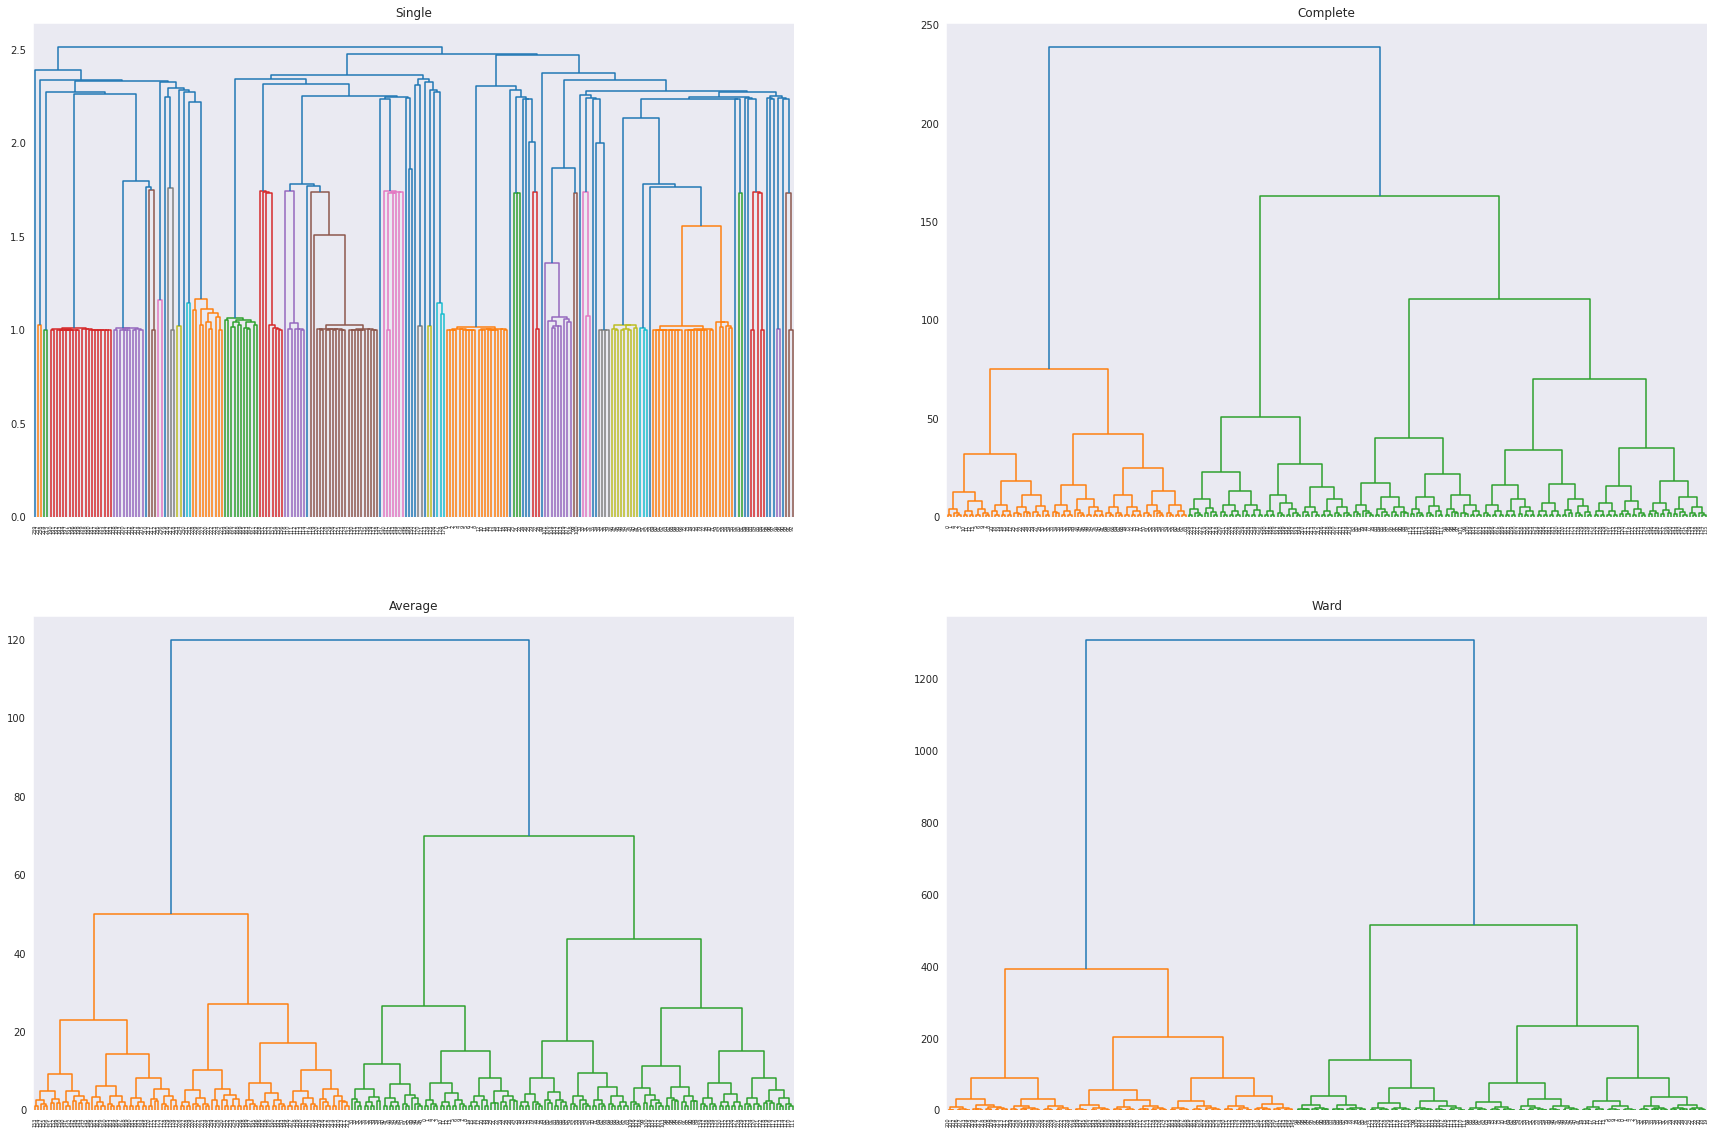

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [ ]:
ddata = data.copy(deep=True)
ddata.head()
ddata['single-cluster'] = ind1
ddata['complete-cluster'] = ind2
ddata['average-cluster'] = ind3
ddata['ward-cluster'] = ind4

# Checking data for Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [ ]:
# Using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(ddata[data.columns].values)

ddata['pca-one'] = pca_result[:,0]
ddata['pca-two'] = pca_result[:,1] 
ddata['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [9.99674262e-01 1.22526488e-04 5.83865431e-05]


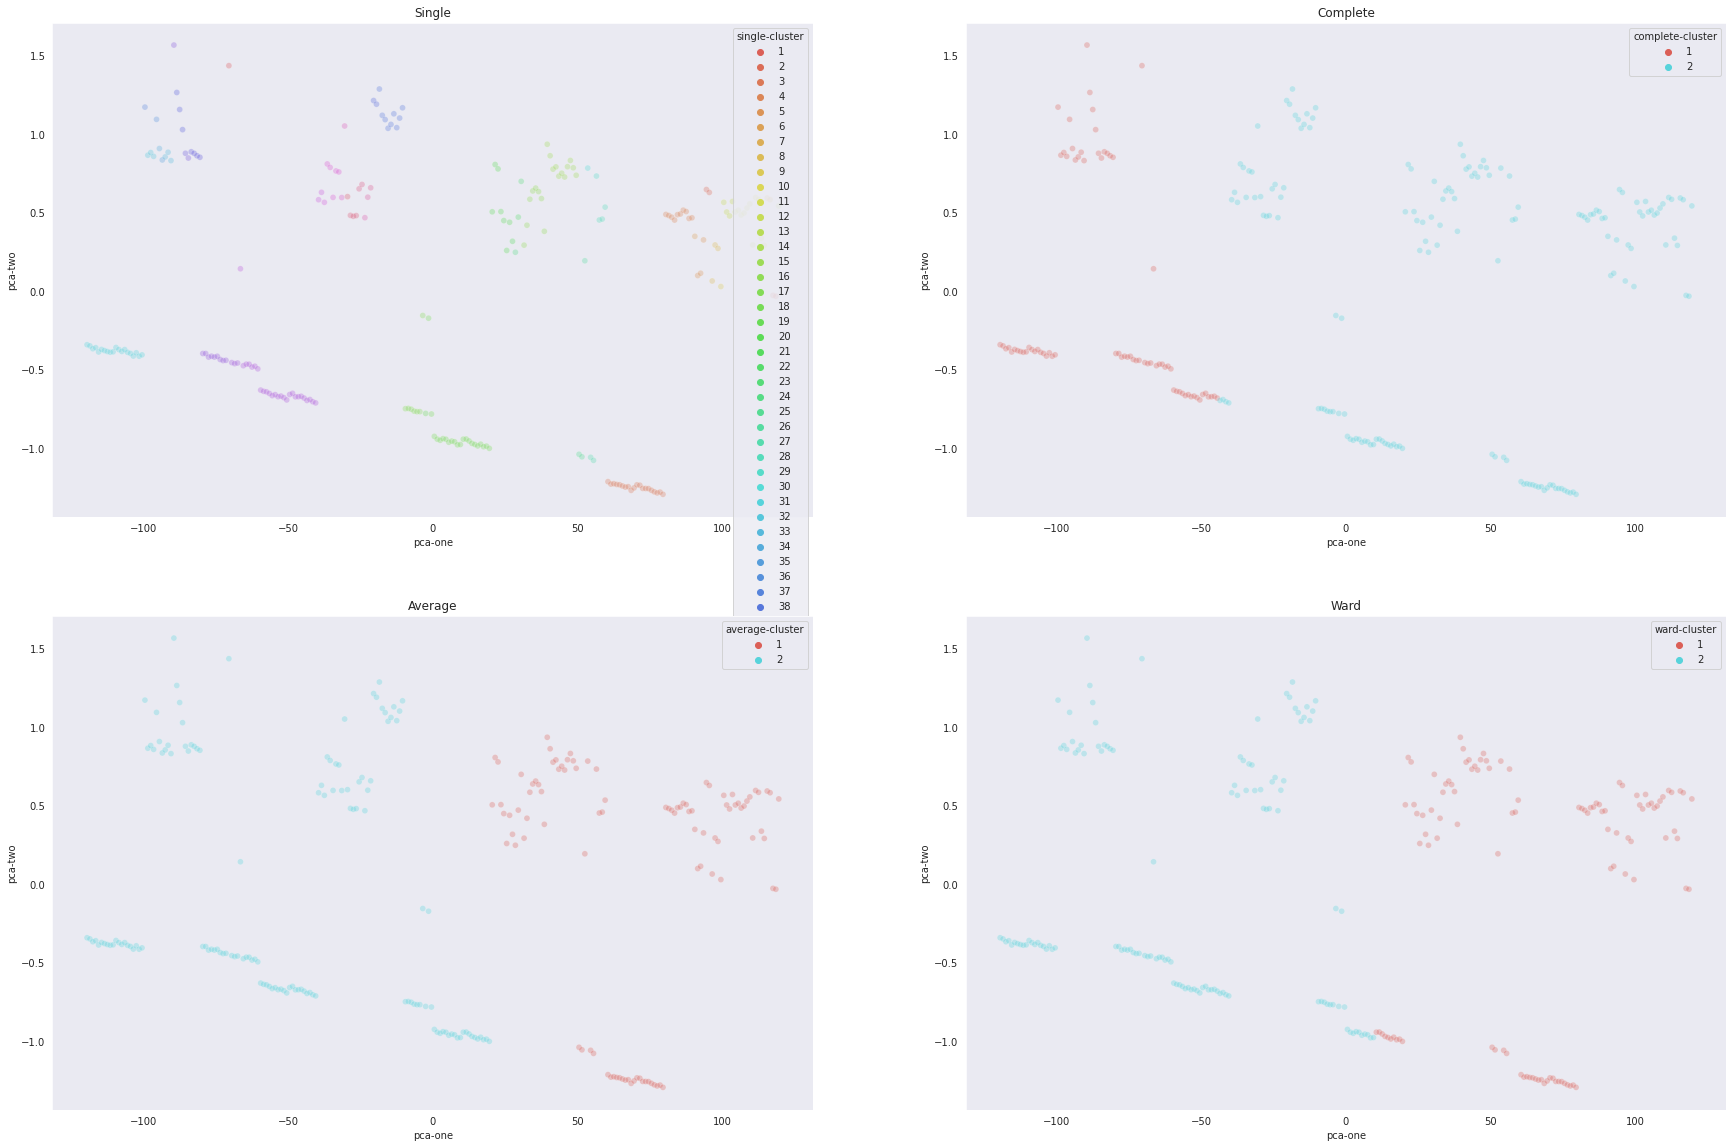

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2,2,1), sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = "single-cluster",
    palette=sns.color_palette("hls", n_clust_1),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Single')
plt.subplot(2,2,2), sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = "complete-cluster",
    palette=sns.color_palette("hls", n_clust_2),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Complete')
plt.subplot(2,2,3), sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = "average-cluster",
    palette=sns.color_palette("hls", n_clust_3),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Average')
plt.subplot(2,2,4), sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = "ward-cluster",
    palette=sns.color_palette("hls", n_clust_4),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Ward')
plt.show()

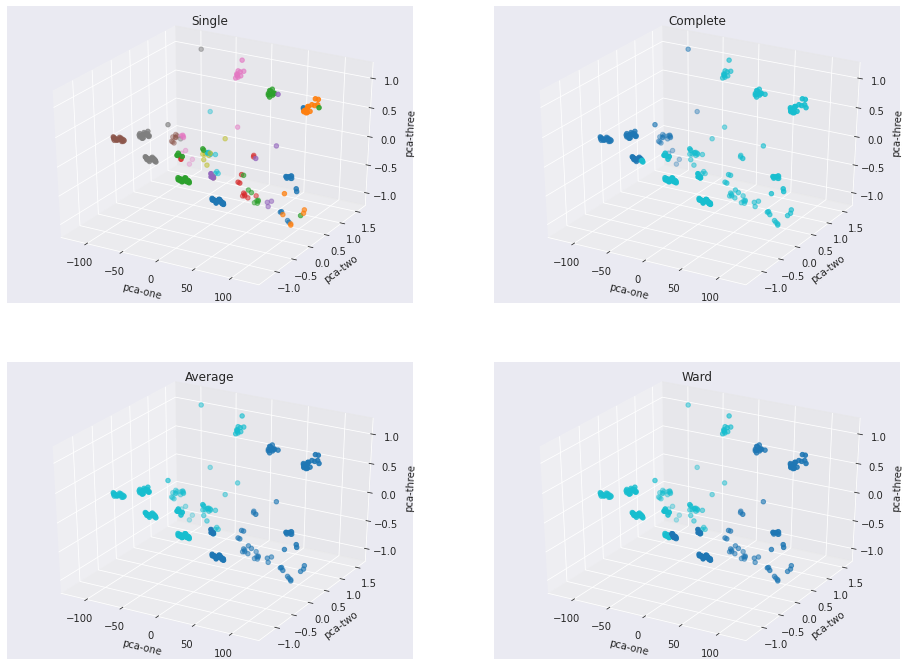

In [ ]:
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

ax1.scatter(
    xs=ddata.loc[:,:]["pca-one"], 
    ys=ddata.loc[:,:]["pca-two"], 
    zs=ddata.loc[:,:]["pca-three"], 
    c=ddata.loc[:,:]["single-cluster"],
    cmap='tab10'
)
ax1.set_xlabel('pca-one')
ax1.set_ylabel('pca-two')
ax1.set_zlabel('pca-three'), ax1.set_title('Single')

ax2.scatter(
    xs=ddata.loc[:,:]["pca-one"], 
    ys=ddata.loc[:,:]["pca-two"], 
    zs=ddata.loc[:,:]["pca-three"], 
    c=ddata.loc[:,:]['complete-cluster'],
    cmap='tab10'
)
ax2.set_xlabel('pca-one')
ax2.set_ylabel('pca-two')
ax2.set_zlabel('pca-three'), ax2.set_title('Complete')

ax3.scatter(
    xs=ddata.loc[:,:]["pca-one"], 
    ys=ddata.loc[:,:]["pca-two"], 
    zs=ddata.loc[:,:]["pca-three"], 
    c=ddata.loc[:,:]['average-cluster'],
    cmap='tab10'
)
ax3.set_xlabel('pca-one')
ax3.set_ylabel('pca-two')
ax3.set_zlabel('pca-three'), ax3.set_title('Average')

ax4.scatter(
    xs=ddata.loc[:,:]["pca-one"], 
    ys=ddata.loc[:,:]["pca-two"], 
    zs=ddata.loc[:,:]["pca-three"], 
    c=ddata.loc[:,:]['ward-cluster'],
    cmap='tab10'
)
ax4.set_xlabel('pca-one')
ax4.set_ylabel('pca-two')
ax4.set_zlabel('pca-three'), ax4.set_title('Ward')
plt.show()


In [ ]:
# T-Sne
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(ddata[data.columns].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 14.732660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.930458
[t-SNE] KL divergence after 300 iterations: 0.118586
t-SNE done! Time elapsed: 0.5952243804931641 seconds


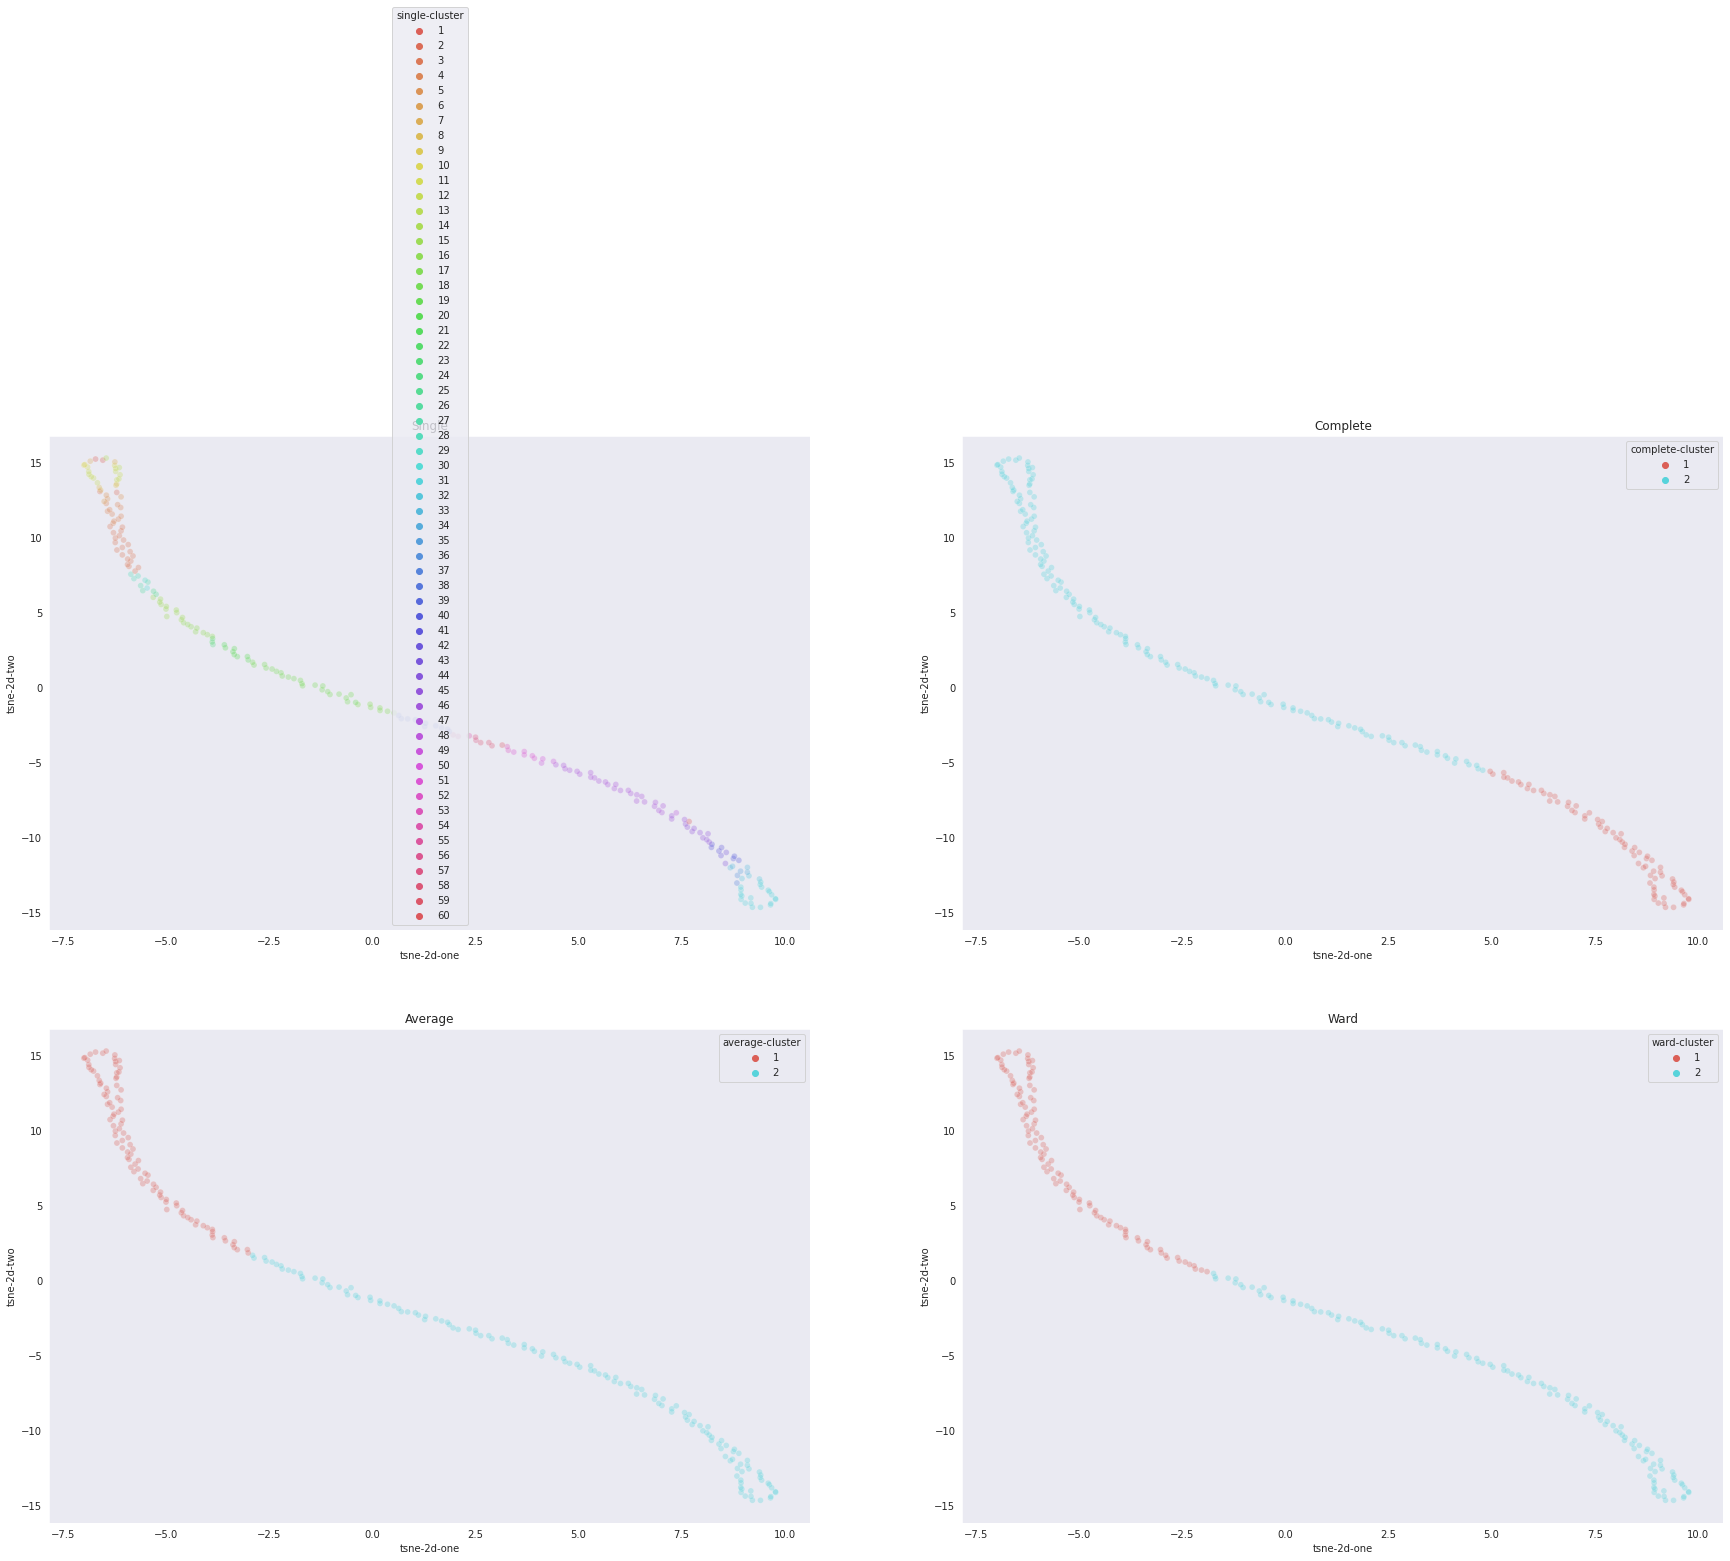

In [ ]:
ddata['tsne-2d-one'] = tsne_results[:,0]
ddata['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(30, 20))
plt.subplot(2,2,1), sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = "single-cluster",
    palette=sns.color_palette("hls", n_clust_1),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Single')
plt.subplot(2,2,2), sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = "complete-cluster",
    palette=sns.color_palette("hls", n_clust_2),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Complete')
plt.subplot(2,2,3), sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = "average-cluster",
    palette=sns.color_palette("hls", n_clust_3),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Average')
plt.subplot(2,2,4), sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = "ward-cluster",
    palette=sns.color_palette("hls", n_clust_4),
    data=ddata.loc[:,:],
    legend="full",
    alpha=0.3
), plt.title('Ward')
plt.show()

In [ ]:
# T-Sne
import time
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(ddata[data.columns].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 14.732660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.641098
[t-SNE] KL divergence after 300 iterations: 2.671903
t-SNE done! Time elapsed: 1.5733997821807861 seconds


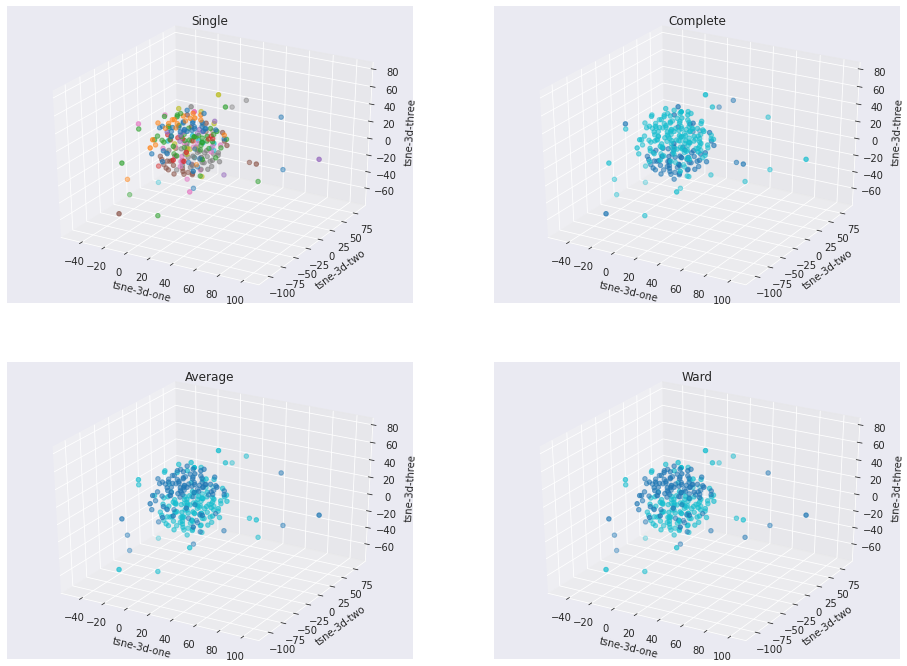

In [ ]:
ddata['tsne-3d-one'] = tsne_results[:,0]
ddata['tsne-3d-two'] = tsne_results[:,1]
ddata['tsne-3d-three'] = tsne_results[:,2]

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

ax1.scatter(
    xs=ddata.loc[:,:]["tsne-3d-one"], 
    ys=ddata.loc[:,:]["tsne-3d-two"], 
    zs=ddata.loc[:,:]["tsne-3d-three"], 
    c=ddata.loc[:,:]["single-cluster"],
    cmap='tab10'
)
ax1.set_xlabel('tsne-3d-one')
ax1.set_ylabel('tsne-3d-two')
ax1.set_zlabel('tsne-3d-three'), ax1.set_title('Single')

ax2.scatter(
    xs=ddata.loc[:,:]["tsne-3d-one"], 
    ys=ddata.loc[:,:]["tsne-3d-two"], 
    zs=ddata.loc[:,:]["tsne-3d-three"], 
    c=ddata.loc[:,:]['complete-cluster'],
    cmap='tab10'
)
ax2.set_xlabel('tsne-3d-one')
ax2.set_ylabel('tsne-3d-two')
ax2.set_zlabel('tsne-3d-three'), ax2.set_title('Complete')

ax3.scatter(
    xs=ddata.loc[:,:]["tsne-3d-one"], 
    ys=ddata.loc[:,:]["tsne-3d-two"], 
    zs=ddata.loc[:,:]["tsne-3d-three"], 
    c=ddata.loc[:,:]['average-cluster'],
    cmap='tab10'
)
ax3.set_xlabel('tsne-3d-one')
ax3.set_ylabel('tsne-3d-two')
ax3.set_zlabel('tsne-3d-three'), ax3.set_title('Average')

ax4.scatter(
    xs=ddata.loc[:,:]["tsne-3d-one"], 
    ys=ddata.loc[:,:]["tsne-3d-two"], 
    zs=ddata.loc[:,:]["tsne-3d-three"], 
    c=ddata.loc[:,:]['ward-cluster'],
    cmap='tab10'
)
ax4.set_xlabel('tsne-3d-one')
ax4.set_ylabel('tsne-3d-two')
ax4.set_zlabel('tsne-3d-three'), ax4.set_title('Ward')
plt.show()



#Evaluation


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# All evaluations.
# 1. Extrinsic
# 2. Intrinsic
# 2(a) Davis Bouldin Index
print('Davis Bouldin Index for the above clutering (Single) = ', metrics.davies_bouldin_score(data.values, ind1))
print('Davis Bouldin Index for the above clutering (Complete) = ', metrics.davies_bouldin_score(data.values, ind2))
print('Davis Bouldin Index for the above clutering (Average) = ', metrics.davies_bouldin_score(data.values, ind3))
print('Davis Bouldin Index for the above clutering (Ward) = ', metrics.davies_bouldin_score(data.values, ind4))

print()
# 2(b) Silhoutte score
print('Silhouette coefficient for the above clutering (Single) = ', metrics.silhouette_score(data.values, ind1))
print('Silhouette coefficient for the above clutering (Complete) = ', metrics.silhouette_score(data.values, ind2))
print('Silhouette coefficient for the above clutering (Average) = ', metrics.silhouette_score(data.values, ind3))
print('Silhouette coefficient for the above clutering (Ward) = ', metrics.silhouette_score(data.values, ind4))

Davis Bouldin Index for the above clutering (Single) =  0.429010302269248
Davis Bouldin Index for the above clutering (Complete) =  0.5013592480263714
Davis Bouldin Index for the above clutering (Average) =  0.5010139168026061
Davis Bouldin Index for the above clutering (Ward) =  0.5009543118201337

Silhouette coefficient for the above clutering (Single) =  0.1478760034514985
Silhouette coefficient for the above clutering (Complete) =  0.548684922069238
Silhouette coefficient for the above clutering (Average) =  0.6063285570779985
Silhouette coefficient for the above clutering (Ward) =  0.6186401174274316


In [ ]:
# Extrinsic
# 2(c) Purity Score
print('Purity Score for the above clutering (Single) = ', purity_score(data_y, ind1))
print('Purity Score for the above clutering (Complete) = ', purity_score(data_y, ind2))
print('Purity Score for the above clutering (Average) = ', purity_score(data_y, ind3))
print('Purity Score for the above clutering (Ward) = ', purity_score(data_y, ind4))

print()
# 2(d) Adjusted Rand Score
print('Adjusted Rand Score for the above clutering (Single) = ', adjusted_rand_score(data_y, ind1))
print('Adjusted Rand Score for the above clutering (Complete) = ', adjusted_rand_score(data_y, ind2))
print('Adjusted Rand Score for the above clutering (Average) = ', adjusted_rand_score(data_y, ind3))
print('Adjusted Rand Score for the above clutering (Ward) = ', adjusted_rand_score(data_y, ind4))

print()
# 2(e) Normalized Mutual Info Score
print('Normalized Mutual Info Score for the above clutering (Single) = ', normalized_mutual_info_score(data_y, ind1))
print('Normalized Mutual Info Score for the above clutering (Complete) = ', normalized_mutual_info_score(data_y, ind2))
print('Normalized Mutual Info Score for the above clutering (Average) = ', normalized_mutual_info_score(data_y, ind3))
print('Normalized Mutual Info Score for the above clutering (Ward) = ', normalized_mutual_info_score(data_y, ind4))


Purity Score for the above clutering (Single) =  0.7916666666666666
Purity Score for the above clutering (Complete) =  0.20833333333333334
Purity Score for the above clutering (Average) =  0.20833333333333334
Purity Score for the above clutering (Ward) =  0.20833333333333334

Adjusted Rand Score for the above clutering (Single) =  0.17851667544407782
Adjusted Rand Score for the above clutering (Complete) =  0.006392627455691369
Adjusted Rand Score for the above clutering (Average) =  0.01160252728317059
Adjusted Rand Score for the above clutering (Ward) =  0.004659696537263011

Normalized Mutual Info Score for the above clutering (Single) =  0.5527210505351642
Normalized Mutual Info Score for the above clutering (Complete) =  0.01800269188162553
Normalized Mutual Info Score for the above clutering (Average) =  0.023998919112731585
Normalized Mutual Info Score for the above clutering (Ward) =  0.014770314577515339


#Random Cluster Assignment

In [ ]:
import random
import scipy.stats as st

trials = 20
dbis, sss, pss, arss, nmiss = [], [], [], [], []

In [ ]:
for i in range(trials):
    random_labels = [random.randrange(-1, len(np.unique(data_y))) for x in range(len(data_y))]
    dbis.append(metrics.davies_bouldin_score(data.values, random_labels))
    sss.append(metrics.silhouette_score(data.values, random_labels))
    pss.append(purity_score(data_y, random_labels))
    arss.append(adjusted_rand_score(data_y, random_labels))
    nmiss.append(normalized_mutual_info_score(data_y, random_labels))

In [ ]:
print("The confidence interval for Davis Bouldin Index is", st.t.interval(alpha=0.99, df=len(dbis)-1, loc=np.mean(dbis), scale=st.sem(dbis)))
print("The confidence interval for Silhoutte Score is", st.t.interval(alpha=0.99, df=len(sss)-1, loc=np.mean(sss), scale=st.sem(sss)))
print("The confidence interval for Purity Score is", st.t.interval(alpha=0.99, df=len(pss)-1, loc=np.mean(pss), scale=st.sem(pss)))
print("The confidence interval for Adjusted Rand Score is", st.t.interval(alpha=0.99, df=len(arss)-1, loc=np.mean(arss), scale=st.sem(arss)))
print("The confidence interval for Normalized Mutual Info Score is", st.t.interval(alpha=0.99, df=len(nmiss)-1, loc=np.mean(nmiss), scale=st.sem(nmiss)))


The confidence interval for Davis Bouldin Index is (15.203544141170461, 16.738045467638795)
The confidence interval for Silhoutte Score is (-0.03489766078971772, -0.029639406566975977)
The confidence interval for Purity Score is (0.2820937159403529, 0.2917624932099739)
The confidence interval for Adjusted Rand Score is (-0.001506349269635591, 0.00039047418715605425)
The confidence interval for Normalized Mutual Info Score is (0.028744323270271564, 0.033145442199969365)
